In [177]:
#pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#read excel file
data = pd.read_csv("201902-fordgobike-tripdata.csv")

#preview data
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [178]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## DATA ISSUES

###### 1. Converting the Time column into a Datetime Object
###### 2. Removing Null Value and missing values

In [180]:
data["start_time"] = pd.to_datetime(data["start_time"])

data["start_time"]

0        2019-02-28 17:32:10.145
1        2019-02-28 18:53:21.789
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 183412, dtype: datetime64[ns]

In [181]:
data["end_time"] = pd.to_datetime(data["end_time"])

data["end_time"]

0        2019-03-01 08:01:55.975
1        2019-03-01 06:42:03.056
2        2019-03-01 05:24:08.146
3        2019-03-01 04:02:36.842
4        2019-03-01 00:20:44.074
                   ...          
183407   2019-02-01 00:12:50.034
183408   2019-02-01 00:10:48.502
183409   2019-02-01 00:08:27.220
183410   2019-02-01 00:07:54.287
183411   2019-02-01 00:04:52.058
Name: end_time, Length: 183412, dtype: datetime64[ns]

In [182]:
#Using .isnull() to ask pandas a question about which columns have null values. This returns True or False.
#Using .sum() to sum up all places where it is "True" that there is a null value

data.isnull()
#data.isnull().sum()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [183]:
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### The below has the null values

start_station_id            197,   
start_station_name          197,   
end_station_id              197,   
end_station_name            197,   
member_birth_year          8265,   
member_gender              8265

## dropping rows

In [184]:
#Using the .isnull() method to drop the rows with nullvalues.


#data = data[data["start_station_id"].isnull()]
#print (data[data["start_station_id"].isnull().sum()])

data["start_station_id"].isnull().sum()

197

In [185]:
data = data[~data["start_station_id"].isnull()]
data["start_station_id"].isnull().sum()

0

In [186]:
#data.info()

In [187]:
data = data[~data["start_station_name"].isnull()]
data["start_station_id"].isnull().sum()

0

In [188]:
data = data[~data["end_station_id"].isnull()]
data["end_station_id"].isnull().sum()

0

In [189]:
data = data[~data["end_station_name"].isnull()]
data["end_station_name"].isnull().sum()

0

In [190]:
data = data[~data["member_birth_year"].isnull()]
data["member_birth_year"].isnull().sum()

0

In [191]:
data = data[~data["member_gender"].isnull()]
data["member_gender"].isnull().sum()

0

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [193]:
data.shape

(174952, 16)

In [194]:
data.to_csv("clean_dataset.csv", index = False)

In [195]:
clean_data = pd.read_csv("clean_dataset.csv")

In [196]:
clean_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
174948,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
174949,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
174950,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### From the dataset we have the following

Below are the data fields present in the raw dataset-

number: unique id for every user

ts: duration_sec, start_time, end_time

start_lat: ride request pickup latitude

start_lng: ride request pickup longitude

end_lat: ride request drop latitude

end_lng: ride request drop longitude 

start_station_name

end_station_name

Gender and birth_year (age)

Bike_Id

### Relationship Between Dataset

## 
        1.Which region demand more for a ride
        2.How long does it takes to move from one station to the other, or how long does it takes to end an everage trip
        3.The gender and average age of people who order for ride
        4.Which of the bike is often booked or more booked
        5.Which of the days of the week is ride ordered the most

## Converting the start and end time column into a Datetime Object

In [197]:
clean_data["start_time"] = pd.to_datetime(data["start_time"])

In [198]:
clean_data["end_time"] = pd.to_datetime(data["end_time"])

## 1. Ride Duration Analysis:
        Calculate and visualize the distribution of ride durations.
        Identify outliers or unusually long/short rides.

In [199]:
# The 'duration_sec' is in seconds; we might need to convert it to minutes for better readability
clean_data['duration_min'] = clean_data['duration_sec'] / 60.0

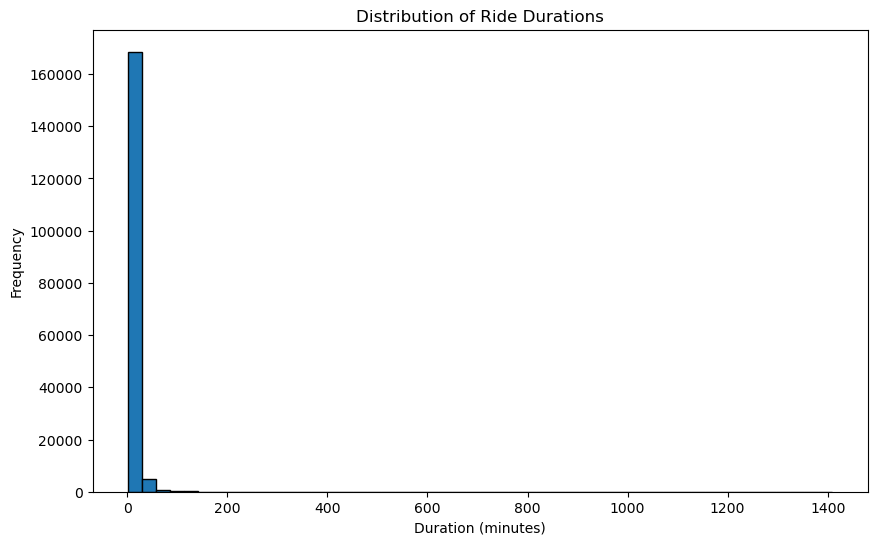

In [200]:
# Visualize the distribution of ride durations
plt.figure(figsize=(10, 6))
plt.hist(clean_data['duration_min'], bins=50, edgecolor='black')
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [203]:
# Identify outliers or unusually long/short rides
# You can define a threshold for what you consider an outlier, for example, rides longer than 2 hours
outlier_threshold = 120  # 2 hours in minutes



long_rides = clean_data[clean_data['duration_min'] > outlier_threshold]
short_rides = clean_data[clean_data['duration_min'] < outlier_threshold / 10]  # Assuming very short rides are less than 1/10th of the threshold

# Print information about outliers
print("long rides:")
print(long_rides[['bike_id','duration_min']])
print("\nShort Rides:")
print(short_rides[['bike_id', 'duration_min']])


long rides:
        bike_id  duration_min
0          4902    869.750000
1          5905   1030.900000
2          6638    608.166667
192        5380    252.050000
287        5830    217.683333
...         ...           ...
170209     5110    520.050000
170428     4642    238.683333
170435     5105    214.900000
171454     5561    176.133333
174001     4944    226.816667

[538 rows x 2 columns]

Short Rides:
        bike_id  duration_min
9          5318      7.633333
10         5848      8.433333
12         4786      6.583333
13         6361      3.466667
14         6572      9.133333
...         ...           ...
174947     4832      8.000000
174948     4960      5.216667
174949     3824      2.350000
174950     5095      2.316667
174951     1057      4.516667

[122696 rows x 2 columns]


In [225]:
# Sort long rides in ascending order
long_rides_sorted = long_rides.sort_values(by='duration_min', ascending=True)

# Sort short rides in ascending order
short_rides_sorted = short_rides.sort_values(by='duration_min', ascending=True)

# Print information about sorted rides
print("Long Rides (Sorted):")
print(long_rides_sorted[['bike_id', 'duration_min']])
print("\nShort Rides (Sorted):")
print(short_rides_sorted[['bike_id', 'duration_min']])

Long Rides (Sorted):
        bike_id  duration_min
65628      5928    120.016667
35083      4800    120.333333
61891       582    120.350000
85024      1248    120.383333
29635      5316    120.416667
...         ...           ...
91253      6152   1375.200000
4987       5781   1386.583333
107291     1842   1390.116667
122163     5561   1391.983333
81604      6301   1409.133333

[538 rows x 2 columns]

Short Rides (Sorted):
        bike_id  duration_min
26013      5921      1.016667
147023     3716      1.016667
42380      6347      1.016667
171377     5102      1.016667
115973     1697      1.016667
...         ...           ...
159978     5312     11.983333
122240     4736     11.983333
68503       518     11.983333
123211     4751     11.983333
121145     5485     11.983333

[122696 rows x 2 columns]


### The Analysis above shows the duration in mins, how long each bikes embark on each moves.
        # The bike with the bike_Id 5928 has the least distance long kong rides.

## 2. Temporal Analysis:
Explore the distribution of rides over time (daily, weekly, monthly).
Identify peak hours or days with high ride demand.
Analyze if there are any trends or patterns in ride start times.

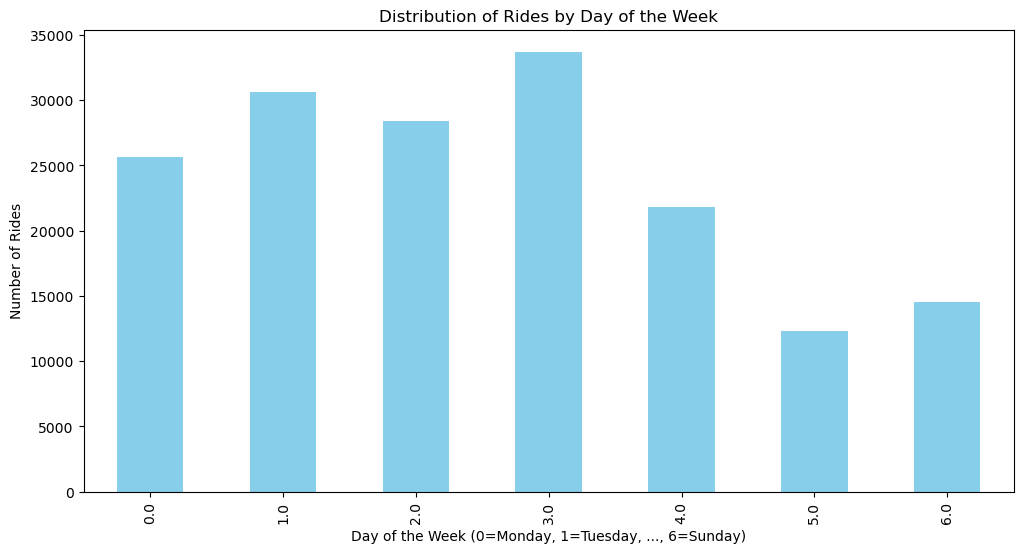

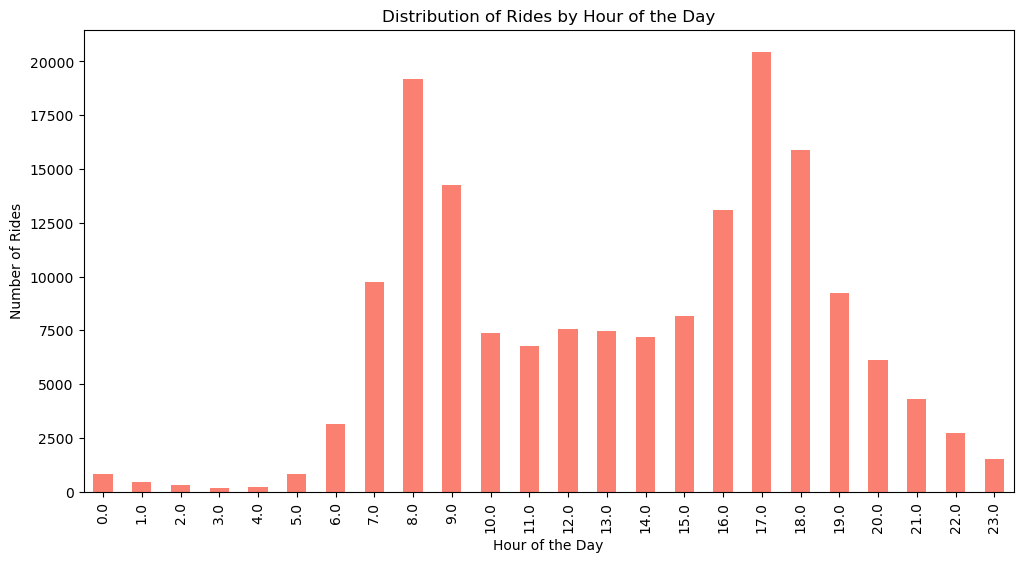

The peak hours for ride demand are around 17.0:00


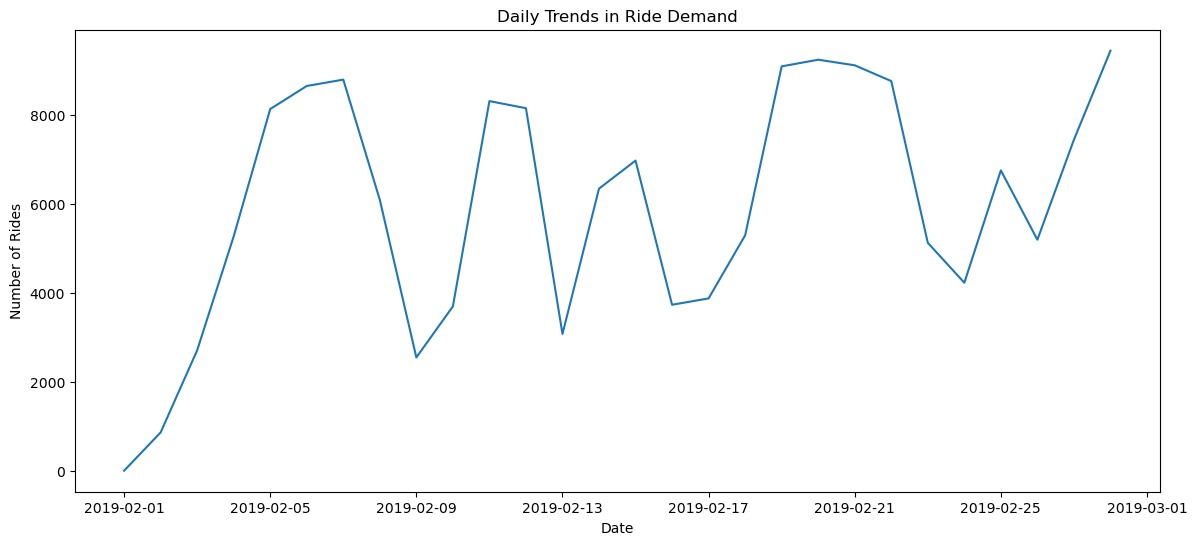

In [210]:
# Extract date, day of the week, and hour of the day
clean_data['date'] = clean_data['start_time'].dt.date
clean_data['day_of_week'] = clean_data['start_time'].dt.dayofweek
clean_data['hour_of_day'] = clean_data['start_time'].dt.hour

# Plot the distribution of rides over days of the week
plt.figure(figsize=(12, 6))
clean_data.groupby('day_of_week').size().plot(kind='bar', color='skyblue')
plt.title('Distribution of Rides by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Number of Rides')
plt.show()

# Plot the distribution of rides over hours of the day
plt.figure(figsize=(12, 6))
clean_data.groupby('hour_of_day').size().plot(kind='bar', color='salmon')
plt.title('Distribution of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

# Identify peak hours
peak_hours = clean_data.groupby('hour_of_day').size().idxmax()
print(f"The peak hours for ride demand are around {peak_hours}:00")

# Analyze trends or patterns in ride start times (you can use additional visualizations or statistical analysis)
# Fplot the number of rides over time (daily or monthly trends)

# Plot the distribution of rides over days
plt.figure(figsize=(14, 6))
clean_data.groupby('date').size().plot()
plt.title('Daily Trends in Ride Demand')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()


## 3. Spatial Analysis:
Visualize ride start and end locations on a map.
Identify popular pickup and drop-off locations.
Explore the relationship between ride frequency and specific geographic areas.

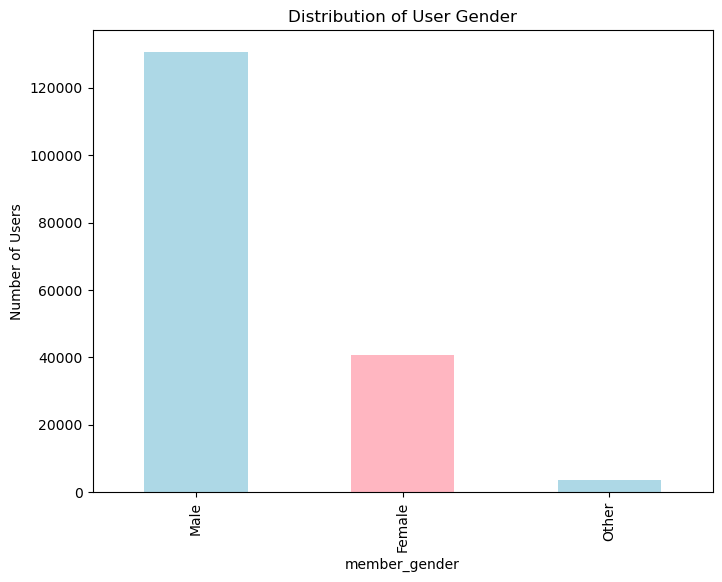

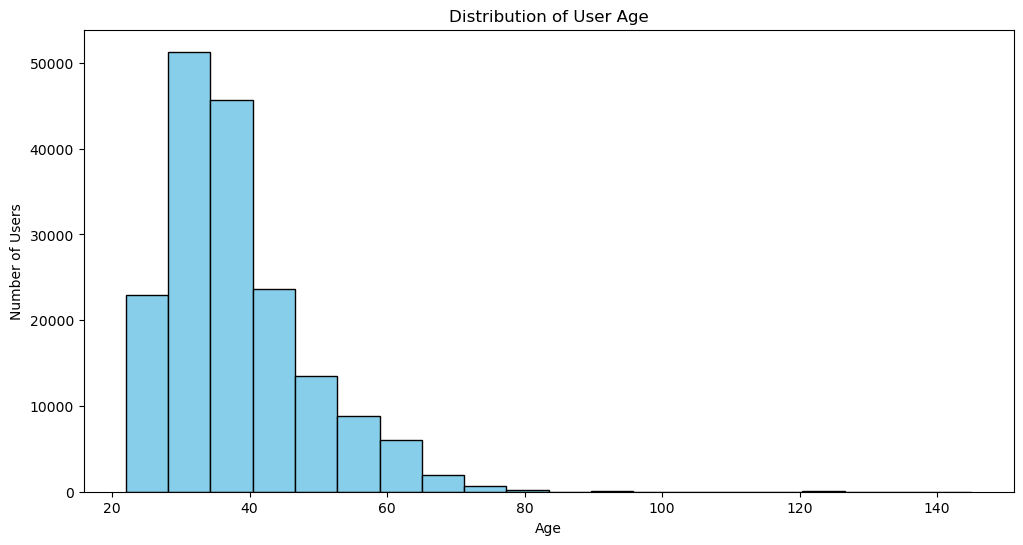

Average Ride Duration by Gender:
member_gender
Female    12.981213
Male      11.206581
Other     16.622141
Name: duration_min, dtype: float64


<Figure size 1000x600 with 0 Axes>

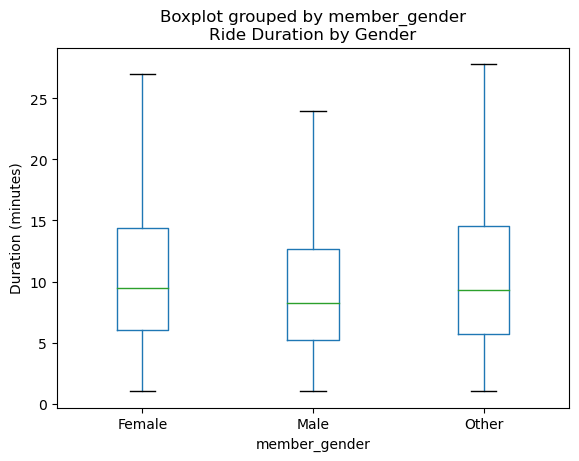

In [213]:
clean_data['member_birth_year'] = pd.to_datetime(clean_data['member_birth_year'], format='%Y').dt.year

# Calculate age of users
current_year = pd.to_datetime('today').year
clean_data['age'] = current_year - clean_data['member_birth_year']

# Plot the distribution of user gender
plt.figure(figsize=(8, 6))
clean_data['member_gender'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Distribution of User Gender')
plt.xlabel('member_gender')
plt.ylabel('Number of Users')
plt.show()

# Plot the distribution of user age
plt.figure(figsize=(12, 6))
clean_data['age'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

# Explore patterns in ride preferences based on user demographics
# For example, you can compare the average ride duration for each gender
average_duration_by_gender = clean_data.groupby('member_gender')['duration_min'].mean()
print("Average Ride Duration by Gender:")
print(average_duration_by_gender)

# You can perform similar analyses for other variables or combinations of variables

# Additionally, you can explore patterns using scatter plots, box plots, or other visualizations
# For example, you can create a box plot of ride duration for each gender
plt.figure(figsize=(10, 6))
clean_data.boxplot(column='duration_min', by='member_gender', showfliers=False, grid=False)
plt.title('Ride Duration by Gender')
plt.xlabel('member_gender')
plt.ylabel('Duration (minutes)')
plt.show()


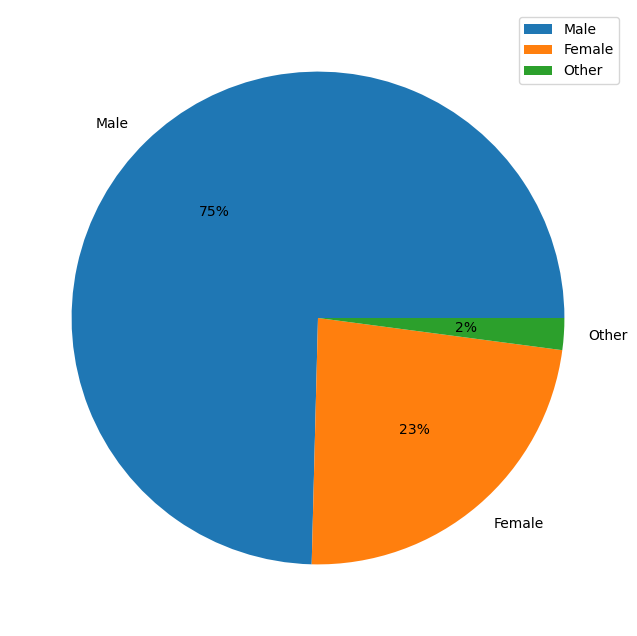

In [216]:
plt.figure(figsize = (8,8))
plt.pie(clean_data["member_gender"].value_counts(), labels = clean_data["member_gender"].value_counts().index, autopct='%.0f%%')
plt.legend();

## 4. User Demographics:
Analyze the distribution of user gender and age.
Explore if there are any patterns in ride preferences based on user demographics.

In [217]:
pip install geopandas folium

                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 196.9 kB/s eta 0:00:06
     ---                                      0.1/1.1 MB 350.1 kB/s eta 0:00:03
     -----                                    0.1/1.1 MB 448.2 kB/s eta 0:00:03
     -------                                  0.2/1.1 MB 535.8 kB/s eta 0:00:02
     -----------                              0.3/1.1 MB 703.7 kB/s eta 0:00:02
     ----------------                         0.5/1.1 MB 901.1 kB/s eta 0:00:01
     --------------------                     0.6/1.1 MB 1.0 MB/s eta 0:00:01
     --------------------                     0.6/1.1 MB 1.0 MB/s eta 0:00:01
     --------------------                     0.6/1.1 MB 1.0 MB/s eta 0:00:01
  

In [218]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [221]:
# Create GeoDataFrames for start and end locations
start_locations = gpd.GeoDataFrame(clean_data, geometry=gpd.points_from_xy(clean_data['start_station_longitude'], clean_data['start_station_latitude']))
end_locations = gpd.GeoDataFrame(clean_data, geometry=gpd.points_from_xy(clean_data['end_station_longitude'], clean_data['end_station_latitude']))

# Plot ride start and end locations on a map
m = folium.Map(location=[clean_data['start_station_latitude'].mean(), clean_data['start_station_longitude'].mean()], zoom_start=12, control_scale=True)

# Add start locations to the map
for idx, row in start_locations.iterrows():
    folium.Marker(location=[row['start_station_latitude'], row['start_station_longitude']], popup=f"Ride {row['bike_id']}").add_to(m)

# Add end locations to the map
for idx, row in end_locations.iterrows():
    folium.Marker(location=[row['end_station_latitude'], row['end_station_longitude']], popup=f"Ride {row['bike_id']}").add_to(m)

# Create a HeatMap to visualize ride frequency
heat_data = [[row['start_station_latitude'], row['start_station_longitude']] for idx, row in clean_data.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save('ride_map.html')  # Save the map as an HTML file


start_station_latitude	start_station_longitude	end_station_id	end_station_name	end_station_latitude	end_station_longitude	bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip

## 5. Time Series Analysis:
Apply time series analysis to identify trends, seasonality, and patterns in ride data.

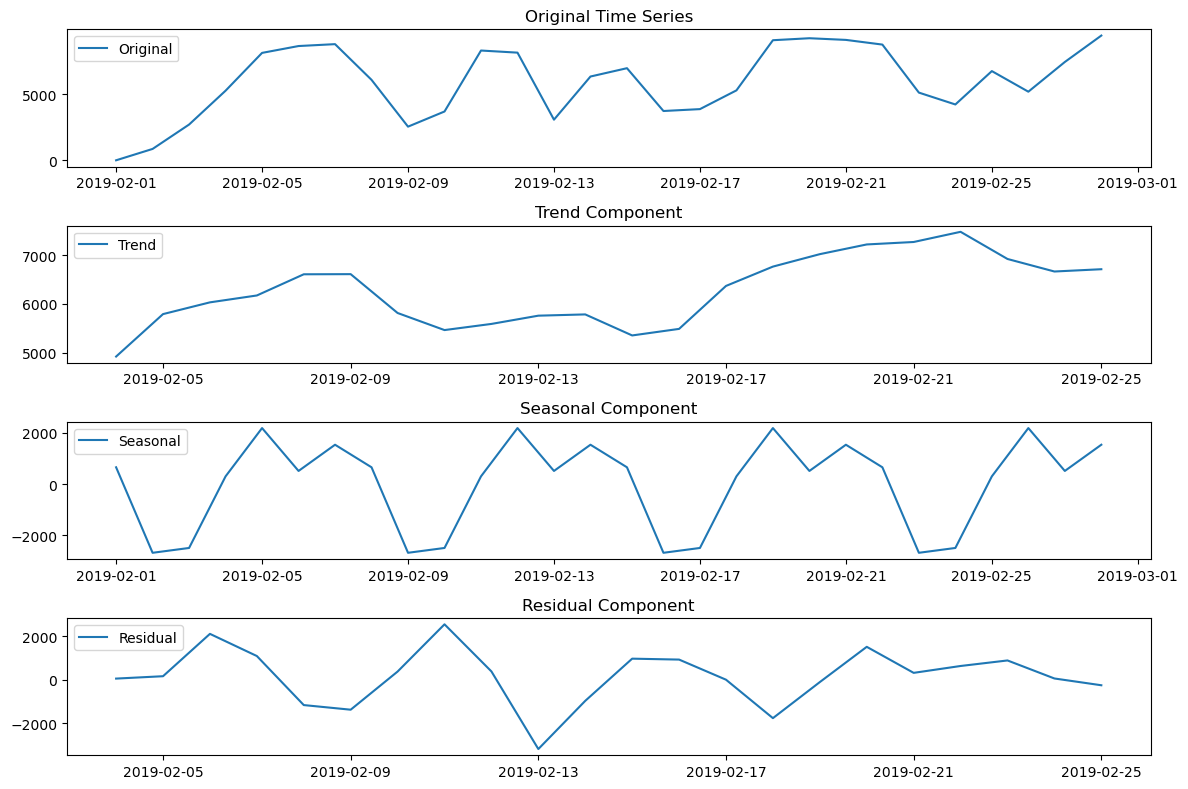

In [222]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'start_time' as the index for time series analysis
clean_data.set_index('start_time', inplace=True)

# Resample the data to a frequency that makes sense for your dataset (e.g., daily, weekly)
resampled_rides = clean_data.resample('D').size()

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(resampled_rides, model='additive')

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(resampled_rides, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
